In [6]:
import numpy as np
import matplotlib.pyplot as plt

## Using Exponential Decay to find 10 pruning amounts that decreases exponentially

In [41]:
def get_exp_curve(total_sum: float) -> list[float]:
    if total_sum == 0:
        return [0.0] * 10
    
    x = np.arange(10)
    decay_target_ratio = 0.01
    
    k_rate = -np.log(decay_target_ratio) / 9
    curve_raw = np.exp(-k_rate * x)
    shift_amount = curve_raw[-1]    
    curve_shifted = curve_raw - shift_amount
    sum_of_shifted = np.sum(curve_shifted)
    scaling_factor = total_sum / sum_of_shifted
    final_curve = curve_shifted * scaling_factor
    final_curve[-1] = 0.0
    return final_curve.tolist()

37.408, 22.274, 13.202, 7.763, 4.502, 2.548, 1.376, 0.674, 0.252, 0.000, 

90.00000000000001

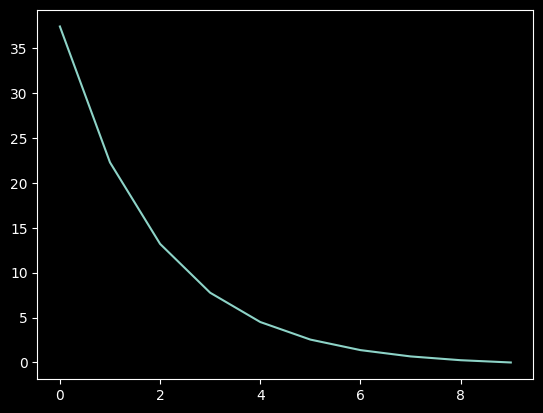

In [44]:
inp = 90
for x in get_exp_curve(inp):
    print(f"{x:.3f}", end=", ")

plt.plot(get_exp_curve(inp))
sum(get_exp_curve(inp))

### method is

1. prune with x[0]
2. fine tune
3. prune with x[1]
4. fine tune
5. prune with x[2]
6. fine tune <br>
...
19. prune with x[9]
20. fine tune
<br>
this should give better results

### time taken would be approx 10x the time taken by the other pruning algorithm
### should go to the global optima, theoritically